In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import mahotas as mh

In [3]:
img = mh.imread('067.png')

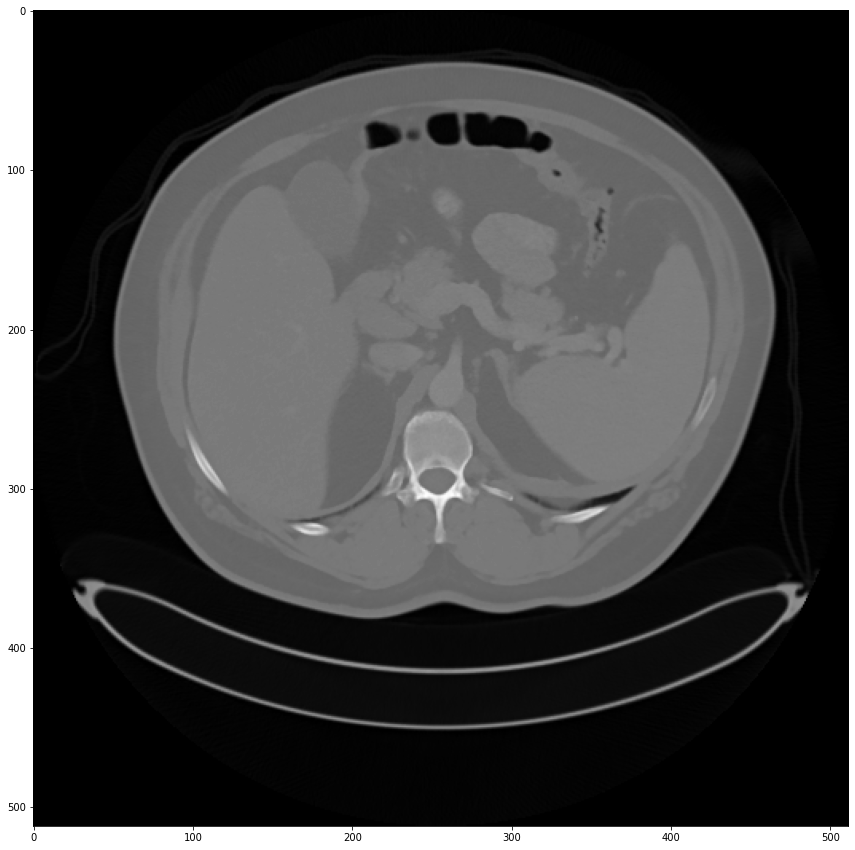

In [6]:
plt.figure(figsize=(15,15))
imshow(img, cmap='gray')

In [16]:
bbox = '200.319, 178.98, 243.662, 208.319'
bbox = [v.strip() for v in bbox.split(',')]
bbox = [float(v) for v in bbox]
bbox = [int(v) for v in bbox]

In [17]:
bbox # x1, y1, x2, y2

[200, 178, 243, 208]

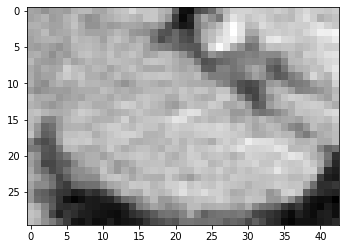

In [18]:
roi = img[bbox[1]:bbox[3], bbox[0]:bbox[2]]
imshow(roi, cmap='gray')

In [24]:
FIXED_SIZE = (50,50)
def crop(img, bbox):

#     img = mh.imread(img)
#     imshow(img)

#     bbox = bbox.split(',')
#     bbox = [int(float(v)) for v in bbox]

    # convert bbox to fixed size
    diff_x = bbox[2] - bbox[0]
    diff_y = bbox[3] - bbox[1]

    pad_x = FIXED_SIZE[0] - diff_x
    pad_y = FIXED_SIZE[1] - diff_y
    
    padded_lesion = img[bbox[1]-int(pad_y/2):bbox[3]+int(pad_y/2), 
                            bbox[0]-int(pad_x/2):bbox[2]+int(pad_x/2)]

         
           
#     if img.shape[0] != FIXED_SIZE[0] or img.shape[1] != FIXED_SIZE[1]:
#          padded_lesion = resize(padded_lesion,FIXED_SIZE )

    #print(padded_lesion.shape)
    
    return padded_lesion

In [25]:
padded = crop(img, bbox)

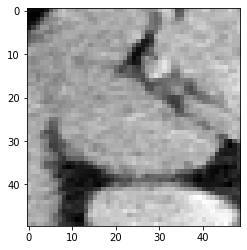

In [26]:
imshow(padded, cmap='gray')

In [27]:
padded.shape

(50, 49)

In [31]:
padded2 = np.resize(padded, FIXED_SIZE)

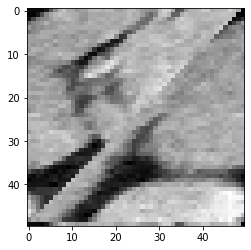

In [32]:
imshow(padded2, cmap='gray') # no good

In [34]:
padded3 = mh.imresize(padded, FIXED_SIZE)

In [42]:
padded4 = padded.astype(np.float32)
padded4 = padded4/padded4.max()

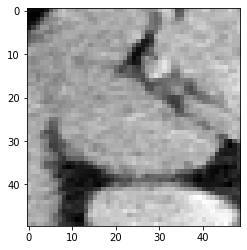

In [43]:
imshow(padded4, cmap='gray')

In [45]:
padded4.min()

0.99213123

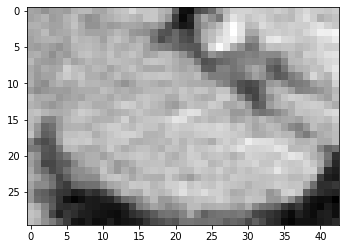

In [23]:
imshow(roi, cmap='gray')

In [46]:
img.max()

34036

In [47]:
img.min()

31744

In [48]:
img2 = (255) / (img.max() - img.min())

In [49]:
img2.max()

0.11125654450261781

In [50]:
img2.min()

0.11125654450261781

In [51]:
img.dtype

dtype('int32')

TypeError: Invalid shape () for image data

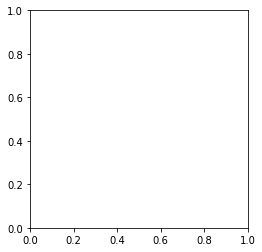

In [53]:
imshow(img2)

In [58]:
th = lambda x: x if x > 0 else 0
th_vector = np.vectorize(th)
def preprocess_image(im):
    im = (im.astype(np.int32) - 32768).astype(np.int16)
    im = ((im + 1024)/(1024 + 3071))*255
    im = th_vector(im)
    im = im.astype(np.uint8)
    return(im) 

In [59]:
img2  = preprocess_image(img)

In [60]:
img2.min()

0

In [61]:
img2.max()

142

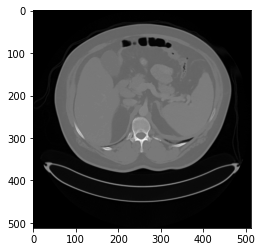

In [63]:
imshow(img2, cmap='gray')